In [1]:
%pylab inline
import numpy as np
import os
import time

data_path = './von_karman/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
filenames = sorted([os.path.join(data_path,f) for f in os.listdir(data_path) if f[-3:] == 'plt'])
timesteps = len(filenames)

U = np.zeros((449,199,timesteps))
V = np.zeros((449,199,timesteps))
W = np.zeros((449,199,timesteps))

timesteps

151

In [3]:
start = time.time()

for timestep in range(timesteps):
    
    timestep_data = np.genfromtxt(filenames[timestep], delimiter=' ',skip_header=6)
    
    for i in range(449):
        
        for j in range(199):
            
            U[i,j,timestep] = timestep_data[i+449*j, 2]
            V[i,j,timestep] = timestep_data[i+449*j, 3]
            W[i,j,timestep] = timestep_data[i+449*j, 4]
            
    print('\rTimestep', timestep+1, 'of', timesteps, 'eta:', \
          int((timesteps-timestep-1)*(timestep+1)/(time.time()-start)), end = 's')

Timestep 151 of 151 eta: 0sss

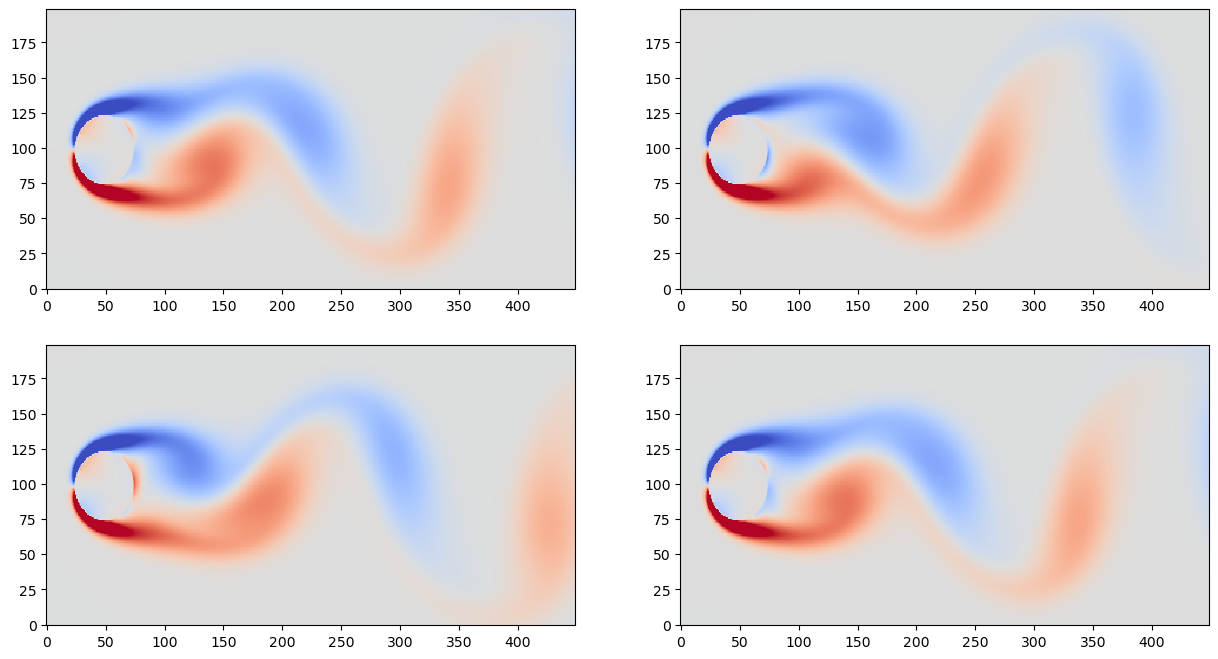

In [4]:
# plot the data
figure(figsize=(15,8))

xx, yy = meshgrid(
    np.arange(449),
    np.arange(199))

for j in range(4):
    subplot(2,2,j+1)
    pcolor(xx,yy,W[:,:,20*j].T,cmap='coolwarm', vmin=-4, vmax=4)

In [5]:
# np.save("../course_timestep_cylinder/Cylinder_U.npy", U)
# np.save("../course_timestep_cylinder/Cylinder_V.npy", V)
# np.save("../course_timestep_cylinder/Cylinder_W.npy", W)